## Import Library & Read Dataset

In [1]:
import os
os.chdir("D:\Course Learning - UM\Sem 5\Data Science Project\Emotion Analysis for Long Covid\Datasets") 
import pickle
import pandas as pd
import numpy as np

from datetime import datetime 
import time

In [2]:
df = pd.read_pickle("emotion_datasetV2.pkl")
df.head()

,Datetime,Tweet Id,Text,Username,Number of Likes,clean_tweet,emotion
0,2021-05-30 23:59:49+00:00,1399153605588836354,As Australia begins the long journey to post-C...,LexiconDigital_,1,australia begin journey postcovid recovery wit...,analytical
1,2021-05-30 23:59:29+00:00,1399153522545942531,"@amyklobuchar @All100Senators Its not over, ev...",bargdaffy161,0,heard hot mess senator,neutral
2,2021-05-30 23:59:00+00:00,1399153402643288064,@JoeBarri Because not all people have had the ...,Miss_Naste,0,opportunity area high percentage want line wea...,neutral
3,2021-05-30 23:58:51+00:00,1399153364311724033,COVID shone a spotlight on for-profit long ter...,JSSBennett,0,shone spotlight forprofit care revera bad offe...,sadness
4,2021-05-30 23:58:37+00:00,1399153305218170882,@kiroriwalanuj @swamiyogeshji @c_aashish @bhar...,Vl17262873,2,yes agree anil sensible look longterm neglect ...,neutral


#### Machine Learning
+ Naive Bayes
+ KNN
+ Logistic Regression
+ Decision Tree


In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

# Split Dataset
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline
import joblib

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import scikitplot as skplt

### Data Resampling --> Unbalance data

In [4]:
df.emotion.value_counts()

analytical    36530
sadness       19822
neutral       18031
tentative      7959
joy            5957
confident      4791
fear           2610
anger          1398
Name: emotion, dtype: int64

In [5]:
# balance data
from sklearn.utils import resample

#Seperate emotion class
df_analytical = df[df['emotion'] == 'analytical']
df_sadness = df[df['emotion'] == 'sadness']
df_neutral = df[df['emotion'] == 'neutral']
df_tentative = df[df['emotion'] == 'tentative']
df_joy = df[df['emotion'] == 'joy']
df_confident = df[df['emotion'] == 'confident']
df_fear = df[df['emotion'] == 'fear']
df_anger = df[df['emotion'] == 'anger']

# Upsample minority class and downsampling majority class 
df_ana_down = resample(df_analytical, replace=True, n_samples=10000, random_state=42)
df_sad_down = resample(df_sadness, replace=True, n_samples=10000, random_state=42)
df_neu_down = resample(df_neutral, replace=True, n_samples=10000, random_state=42)
df_ten_down = resample(df_tentative, replace=True, n_samples=10000, random_state=42)
df_joy_down = resample(df_joy, replace=True, n_samples=10000, random_state=42)
df_con_up = resample(df_confident, replace=True, n_samples=10000, random_state=42)
df_fea_up = resample(df_fear, replace=True, n_samples=10000, random_state=42)
df_ang_up = resample(df_anger, replace=True, n_samples=10000, random_state=42)

# Combine majority class with upsampled minority class
dataset_resampled = pd.concat([df_ana_down,df_sad_down,df_neu_down,df_ten_down,
                               df_joy_down,df_con_up,df_fea_up,df_ang_up])

# Display new class counts
print("Before")
print(df.emotion.value_counts())
print("After")
print(dataset_resampled.emotion.value_counts())

Before
analytical    36530
sadness       19822
neutral       18031
tentative      7959
joy            5957
confident      4791
fear           2610
anger          1398
Name: emotion, dtype: int64
After
joy           10000
analytical    10000
sadness       10000
fear          10000
confident     10000
neutral       10000
tentative     10000
anger         10000
Name: emotion, dtype: int64


In [6]:
dataset_resampled

,Datetime,Tweet Id,Text,Username,Number of Likes,clean_tweet,emotion
43013,2021-06-25 13:42:44+00:00,1408420397289295872,"@CTVNews Expected, as long as Covid exists we ...",dinapea,3,expect exists manage,analytical
2464,2021-05-30 06:33:08+00:00,1398890200990773252,@imnowtweeting @DeanRosario @MartinPakulaMP @s...,mattySP__,1,qld app mandatory business week ago certainly ...,analytical
30862,2021-06-28 11:26:12+00:00,1409473199448932354,@slickntired @SuperMinuencia She works in a UK...,DrHlexia,2,work uk virology lab help set uks test system ...,analytical
17274,2021-05-26 07:39:57+00:00,1397457464715526147,@UncleFatsoPhil @TSinghmorethanl In theoretica...,Snyberwiz,0,theoretical term point real world excellent st...,analytical
45903,2021-07-30 19:28:47+00:00,1421191057027514371,"@JonahEmery Kids can be vectors for spread, th...",RealStirfryguy,1,kid vector spread hospitalize die fact,analytical
...,...,...,...,...,...,...,...
69471,2021-08-30 14:10:22+00:00,1432344948783951879,@DR_VP_ Israel Warns COVID 'Green Pass' Will E...,ElsionP,0,israel warn green pas expire resident jabevery...,anger
83498,2021-09-27 17:52:57+00:00,1442547827565948929,Possibly exposed to COVID via my boss (not an ...,Kakushigo1,2,possibly expose bos issue shit happens single ...,anger
91207,2021-09-26 01:09:01+00:00,1441932791151616001,"As long as this shit been going on, the pandem...",kravekilo,0,shit go pandemic hit rn pack tf fr,anger
3500,2021-05-29 19:51:23+00:00,1398728698224955393,#ToryCriminals have been killing vulnerable Br...,magmogz135,1,kill vulnerable british come murder,anger


## Splitting Data

In [7]:
X = dataset_resampled['clean_tweet']
y = dataset_resampled['emotion']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline Creation

In [9]:
## Pipeline
## 1. Data Preprocessing - Vectorization/Tokenization
## 2. Apply Classifier

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Execution time is:  0:00:11.495446

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.878375
Accuracy score:  0.878375
F1-score:  0.8760084813286055
Precision-score:  0.8757461607711947
Recall-score:  0.8776768280652261
ROC-AUC-score:  0.9769268198372251
[[1445   11   56   28   67  161  125   80]
 [   0 2049    0    0    0    2    0    0]
 [  21    5 1940    6   17   21   22    4]
 [   0    0    3 1940    3   20    4    4]
 [  22    2   21    2 1826   61   12   14]
 [ 108   33   53   30   92 1518  129   72]
 [  97   14   46   33   17  153 1497   76]
 [  38    5   12   16   23   57   48 1839]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


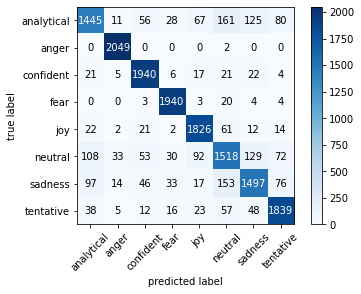

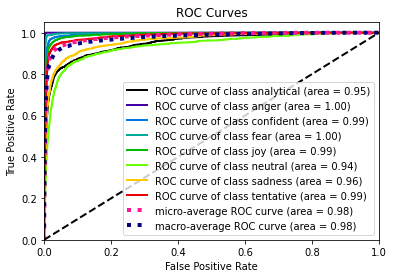

In [36]:
# Testing

pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1), min_df=0.00001)),
                         ('lr_model', LogisticRegression(C=10000, solver='saga', n_jobs=-1))]) 

#TfidfVectorizer(ngram_range=(1,1)

start = datetime.now()

pipeline_lr.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

pipe_dict = {1: 'Logistic Regression'}
i=1
class_names = ['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral', 'sadness', 'tentative']

y_predict_test = pipeline_lr.predict(X_test)
y_predict_proba = pipeline_lr.predict_proba(X_test)
print("\n========== {} ==========".format(pipe_dict[i]))
print("{} Test Accuracy: {}".format(pipe_dict[i],pipeline_lr.score(X_test,y_test)))
print('Accuracy score: ',accuracy_score(y_test, y_predict_test))
print('F1-score: ',f1_score(y_test, y_predict_test, average='macro'))
print('Precision-score: ',precision_score(y_test, y_predict_test, average='macro'))
print('Recall-score: ',recall_score(y_test, y_predict_test, average='macro'))
print('ROC-AUC-score: ',roc_auc_score(y_test, y_predict_proba, average='macro', multi_class='ovo'))
print(confusion_matrix(y_test, y_predict_test)) 

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict_test),class_names=class_names,colorbar=True) 
skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
plt.show()

# BOW - Unigrams

In [9]:
# BagOfWords


pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('mnb_model', MultinomialNB(alpha=0.315789, fit_prior=True))])

pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('lr_model', LogisticRegression(C=10000, solver='saga', n_jobs=-1))]) 

pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('rf_model', RandomForestClassifier(n_estimators=200, n_jobs=-1))])

pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('knn_model', KNeighborsClassifier())])

pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('svm_model', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, 
                                                     random_state=42, max_iter=5, tol=None))])

pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('dt_model', DecisionTreeClassifier(criterion='gini', max_depth=None))]) 

In [10]:
## Make the list of pipelines
pipelines = [pipeline_mnb, pipeline_lr, pipeline_rf, pipeline_knn, pipeline_svm, pipeline_dt] #, pipeline_svm

In [11]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Multinomial NaiveBayes', 1: 'Logistic Regression', 2: 'Random Forest', 
             3: 'K-nearest Neighbors', 4: 'Support Vector Machine', 5: 'Decision Tree'}

start = datetime.now()

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Execution time is:  0:04:08.634227



========== Multinomial NaiveBayes ==========
Multinomial NaiveBayes Test Accuracy: 0.72925
Accuracy score:  0.72925
F1-score:  0.720693464372734
Precision-score:  0.7217747274057326
Recall-score:  0.7287088369729712
ROC-AUC-score:  0.9459166041408821
[[1164   51  110  104  129  126  203   86]
 [   4 1971   13   11    2   12   28   10]
 [  78   51 1646   61   66   45   72   17]
 [  40   13   14 1819   11   28   30   19]
 [ 117   34   40   29 1535   83   60   62]
 [ 238  149  107  130  188  877  212  134]
 [ 167   83   87  121   68  107 1179  121]
 [ 130   46   15   79   97   63  131 1477]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


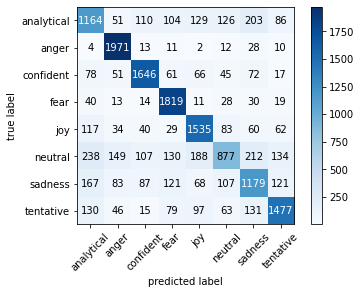

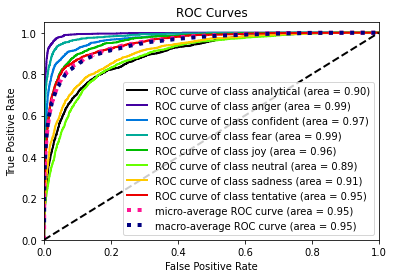


========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.8781875
Accuracy score:  0.8781875
F1-score:  0.8758307273063908
Precision-score:  0.8755989964626312
Recall-score:  0.8774861429659169
ROC-AUC-score:  0.9769059791363539
[[1440   11   56   28   67  166  126   79]
 [   0 2049    0    0    0    2    0    0]
 [  21    5 1940    6   17   21   22    4]
 [   0    0    3 1940    3   20    4    4]
 [  22    2   21    2 1826   61   12   14]
 [ 109   32   52   29   92 1519  128   74]
 [  96   15   47   32   17  154 1498   74]
 [  39    5   12   16   23   58   46 1839]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


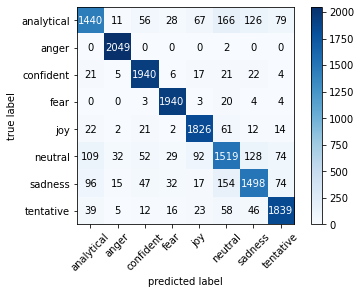

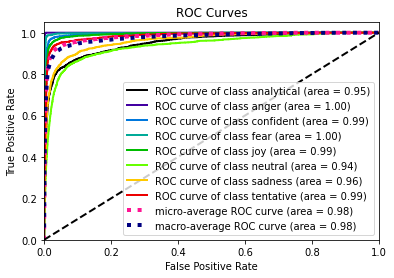


========== Random Forest ==========
Random Forest Test Accuracy: 0.8490625
Accuracy score:  0.8490625
F1-score:  0.843545400803735
Precision-score:  0.8445421826930899
Recall-score:  0.8478410447386664
ROC-AUC-score:  0.9805664590778048
[[1248   10  110   28  103  207  134  133]
 [   0 2051    0    0    0    0    0    0]
 [  19    3 1965    7    9   10   16    7]
 [   5    0    0 1948    0    6    5   10]
 [  30    4   32    5 1783   63    8   35]
 [ 127   45   74   25  148 1403  119   94]
 [ 145   32   77   28   48  137 1325  141]
 [  45   10    8   17   27   45   24 1862]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


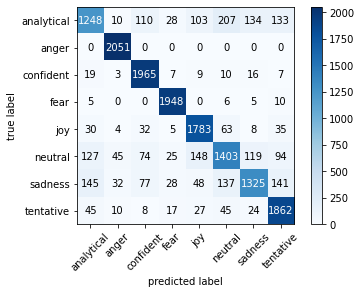

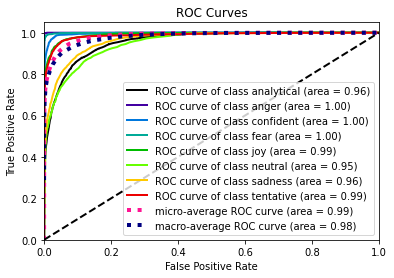


========== K-nearest Neighbors ==========
K-nearest Neighbors Test Accuracy: 0.574
Accuracy score:  0.574
F1-score:  0.5701198396337421
Precision-score:  0.6269410125756233
Recall-score:  0.5711775101493337
ROC-AUC-score:  0.8722221656074644
[[ 663   41  124   82  116  778   82   87]
 [   6 1994    9    4    2   36    0    0]
 [ 133   53 1194   40   37  471   54   54]
 [  69   10   31 1655    7  161   17   24]
 [ 114   41   82   55 1022  561   24   61]
 [ 160   82   97   73  140 1387   36   60]
 [ 211   69  107  119  110  819  400   98]
 [ 165   34   66   76  104  664   60  869]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


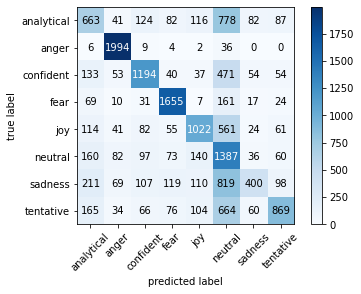

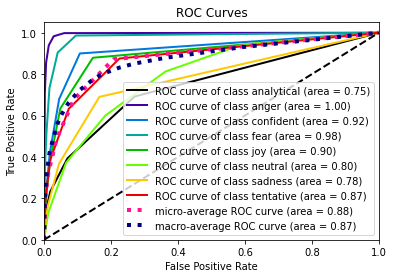


========== Support Vector Machine ==========
Support Vector Machine Test Accuracy: 0.7210625
Accuracy score:  0.7210625
F1-score:  0.7189568037166264
Precision-score:  0.7223522589620537
Recall-score:  0.7201996556135803
ROC-AUC-score:  0.9390199457980177
[[1023   33  121   61  166  246  208  115]
 [  29 1866   24   11   26   48   42    5]
 [  51   53 1629   33   72  124   72    2]
 [  46   30   21 1590   29  132   75   51]
 [  42   14   84   16 1556  150   38   60]
 [ 113  109   81   37  249 1190  162   94]
 [ 128   71   83   52   76  190 1223  110]
 [  95   42   27   44  115  150  105 1460]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


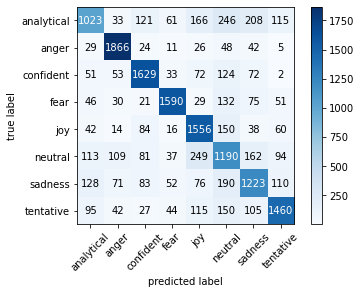

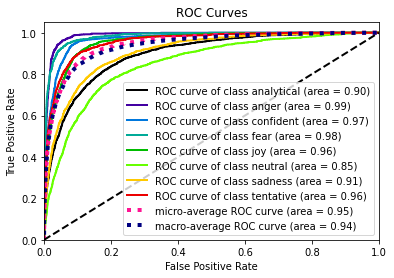


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.8148125
Accuracy score:  0.8148125
F1-score:  0.807799248875645
Precision-score:  0.8065677415224615
Recall-score:  0.8135416538097857
ROC-AUC-score:  0.8941560034385866
[[1121   24  107   56  111  211  219  124]
 [   3 2048    0    0    0    0    0    0]
 [  27    8 1908    8   20   21   30   14]
 [   6    0    2 1943    2    5    7    9]
 [  32   14   31   12 1730   71   30   40]
 [ 163   45   58   44  176 1293  152  104]
 [ 172   39   78   44   64  157 1241  138]
 [  54   18   10   22   44   70   67 1753]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


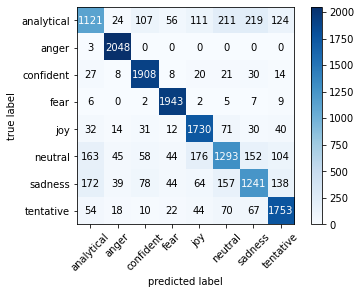

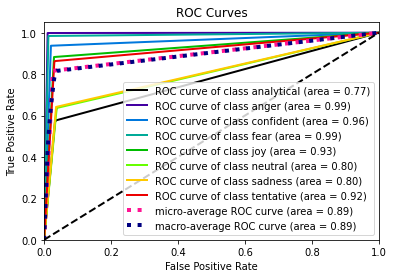

--------------------------------------
Classifier with best accuracy:Logistic Regression


In [12]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
class_names = ['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral', 'sadness', 'tentative']

for i,model in enumerate(pipelines):
    
    y_predict_test = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('Accuracy score: ',accuracy_score(y_test, y_predict_test))
    print('F1-score: ',f1_score(y_test, y_predict_test, average='macro'))
    print('Precision-score: ',precision_score(y_test, y_predict_test, average='macro'))
    print('Recall-score: ',recall_score(y_test, y_predict_test, average='macro'))
    print('ROC-AUC-score: ',roc_auc_score(y_test, y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_test, y_predict_test)) 
    
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict_test),class_names=class_names,colorbar=True) 
    skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
    plt.show()

# Best accuracy model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('--------------------------------------')
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))    

# BOW - Bigrams

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Execution time is:  0:49:24.473613

========== Multinomial NaiveBayes ==========
Multinomial NaiveBayes Test Accuracy: 0.7538125
Accuracy score:  0.7538125
F1-score:  0.7448712747773452
Precision-score:  0.7458426540426522
Recall-score:  0.7529554315265505
ROC-AUC-score:  0.9568288754606903
[[ 991   49  114   89   97  164  328  141]
 [   0 2042    1    0    0    3    2    3]
 [  55   20 1784   27   20   40   70   20]
 [   7    4    5 1911    2   10   26    9]
 [  45   17   39   36 1602   70   96   55]
 [ 213   79  126   93  119  964  319  122]
 [ 178   53   83   95   63  107 1226  128]
 [ 114   24   33   69   48   67  142 1541]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


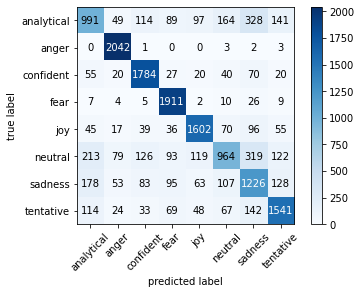

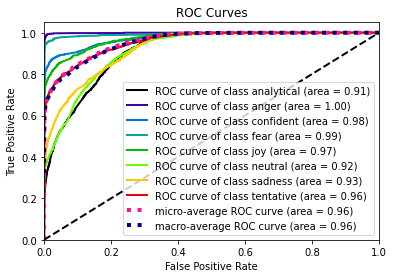


========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.7789375
Accuracy score:  0.7789375
F1-score:  0.7819136416315458
Precision-score:  0.7997508863066458
Recall-score:  0.777295742259112
ROC-AUC-score:  0.9615583765878435
[[ 971    5   53   12   58  577  166  131]
 [   0 2043    0    0    0    8    0    0]
 [  51    1 1746    4    6  158   50   20]
 [   8    0    4 1904    4   26   19    9]
 [  44    2   19    7 1574  240   33   41]
 [ 159    7   51   10   62 1543  113   90]
 [ 181    7   35   11   29  420 1153   97]
 [ 110    1    6   15   27  295   55 1529]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


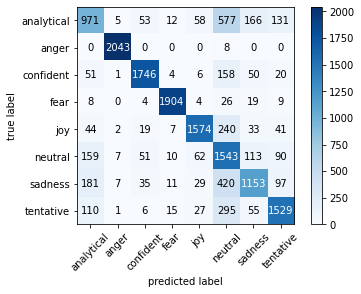

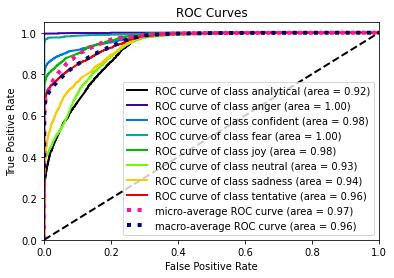


========== Random Forest ==========
Random Forest Test Accuracy: 0.7636875
Accuracy score:  0.7636875
F1-score:  0.7677802607899045
Precision-score:  0.8055230364603556
Recall-score:  0.7615383819553708
ROC-AUC-score:  0.9487990301301856
[[ 831    9   49   21   65  769  146   83]
 [   1 2042    0    0    0    8    0    0]
 [  28    2 1739    6    9  212   29   11]
 [  15    1    1 1911    0   36    7    3]
 [  27    1   19    5 1542  318   23   25]
 [ 122   11   36   14   59 1674   71   48]
 [ 128    7   55   15   41  580 1016   91]
 [  78    5   11   14   34  394   38 1464]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


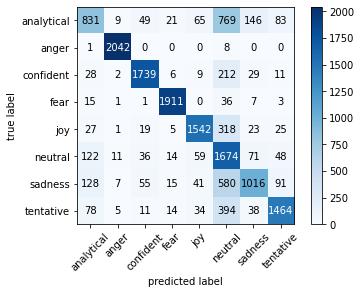

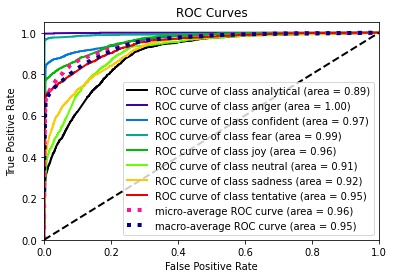


========== K-nearest Neighbors ==========
K-nearest Neighbors Test Accuracy: 0.5206875
Accuracy score:  0.5206875
F1-score:  0.517763352067407
Precision-score:  0.6318435248166576
Recall-score:  0.5181315187736719
ROC-AUC-score:  0.8260977834631239
[[ 825   87   24  103   33  773   29   99]
 [  29 1989    2    7    1   20    2    1]
 [ 308   83 1048   76   16  448    8   49]
 [  98   27    8 1674    4  143    8   12]
 [ 341   56    8   91  879  507   13   65]
 [ 631   76   21  123   18 1087   21   58]
 [ 507   96   36  119   38  853  187   97]
 [ 427   73   17  112   38  707   22  642]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


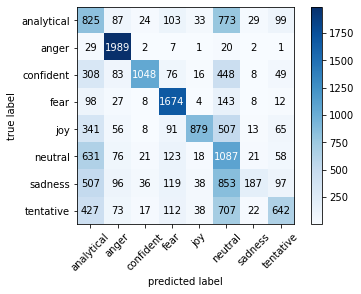

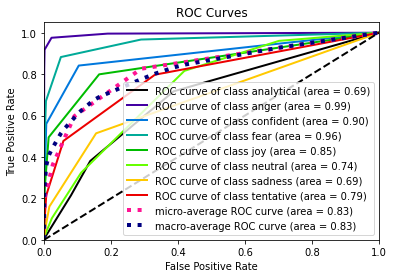


========== Support Vector Machine ==========
Support Vector Machine Test Accuracy: 0.700625
Accuracy score:  0.700625
F1-score:  0.6979483992066926
Precision-score:  0.707920323179053
Recall-score:  0.6993304201439643
ROC-AUC-score:  0.9119731395043392
[[ 779   30   66   52  193  447  219  187]
 [   1 1915    7    2   16   88   12   10]
 [  63   18 1549   30   81  167   93   35]
 [  31   13   19 1690   26  109   48   38]
 [  49   20   40   22 1549  159   56   65]
 [ 136   54   59   52  199 1250  130  155]
 [ 123   38   46   65  132  302 1078  149]
 [  80   26   21   67  113  215  116 1400]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


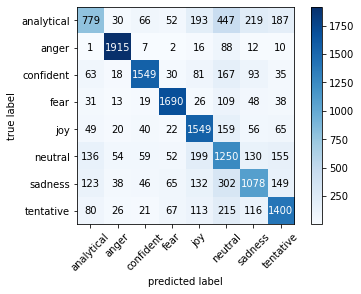

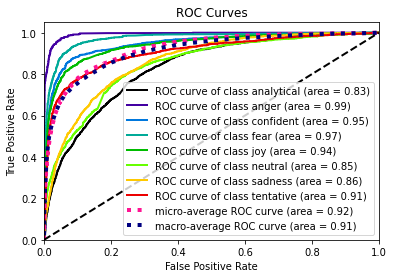


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.7570625
Accuracy score:  0.7570625
F1-score:  0.7591786068671476
Precision-score:  0.786585159583058
Recall-score:  0.7551441675747884
ROC-AUC-score:  0.8974434826222195
[[ 800   18   62   30   69  727  183   84]
 [   0 2042    0    0    0    8    1    0]
 [  34    8 1731    7   13  191   40   12]
 [  15    1    3 1908    1   32    8    6]
 [  30    6   18    9 1550  287   31   29]
 [ 133   23   58   18   57 1566  125   55]
 [ 151   10   42   27   42  505 1066   90]
 [  83    9   14   18   43  358   63 1450]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


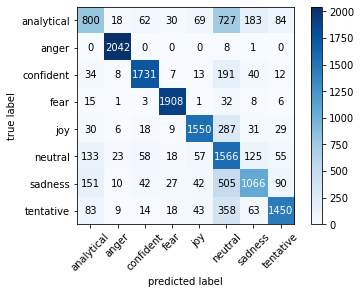

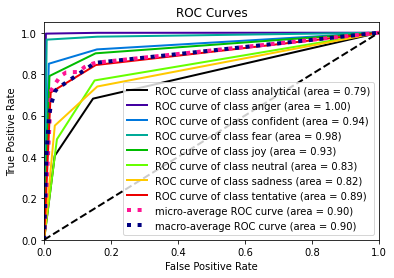

--------------------------------------
Classifier with best accuracy:Logistic Regression


In [13]:
# BagOfWords

pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('mnb_model', MultinomialNB(alpha=0.315789, fit_prior=True))])

pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('lr_model', LogisticRegression(C=10000, solver='saga', n_jobs=-1))])

pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('rf_model', RandomForestClassifier(n_estimators=200, n_jobs=-1))])

pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('knn_model', KNeighborsClassifier())])

pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('svm_model', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, 
                                                     random_state=42, max_iter=5, tol=None))])

pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                         ('dt_model', DecisionTreeClassifier(criterion='gini', max_depth=None))])

## Make the list of pipelines
pipelines = [pipeline_mnb, pipeline_lr, pipeline_rf, pipeline_knn, pipeline_svm, pipeline_dt] #, pipeline_svm

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Multinomial NaiveBayes', 1: 'Logistic Regression', 2: 'Random Forest', 
             3: 'K-nearest Neighbors', 4: 'Support Vector Machine', 5: 'Decision Tree'}

start = datetime.now()

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
class_names = ['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral', 'sadness', 'tentative']

for i,model in enumerate(pipelines):
    
    y_predict_test = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('Accuracy score: ',accuracy_score(y_test, y_predict_test))
    print('F1-score: ',f1_score(y_test, y_predict_test, average='macro'))
    print('Precision-score: ',precision_score(y_test, y_predict_test, average='macro'))
    print('Recall-score: ',recall_score(y_test, y_predict_test, average='macro'))
    print('ROC-AUC-score: ',roc_auc_score(y_test, y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_test, y_predict_test)) 
    
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict_test),class_names=class_names,colorbar=True) 
    skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
    plt.show()

# Best accuracy model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('--------------------------------------')
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))    

# TF-IDF - Unigram

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Execution time is:  0:04:05.344696

========== Multinomial NaiveBayes ==========
Multinomial NaiveBayes Test Accuracy: 0.7256875
Accuracy score:  0.7256875
F1-score:  0.7157727067607591
Precision-score:  0.7200785161065122
Recall-score:  0.7252014097918407
ROC-AUC-score:  0.9448580751530231
[[1166   58  120  122  124   93  210   80]
 [   7 1983    7   11    0   12   24    7]
 [  89   60 1618   65   70   44   74   16]
 [  38   11   19 1836   13   15   22   20]
 [ 119   40   47   34 1538   68   54   60]
 [ 231  149  114  157  189  838  220  137]
 [ 168   93   98  134   73   84 1165  118]
 [ 125   46   17  102  102   52  127 1467]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


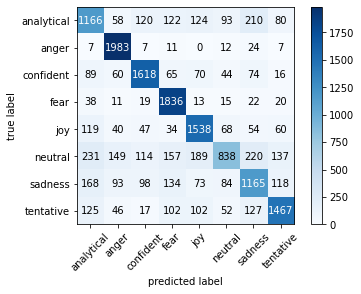

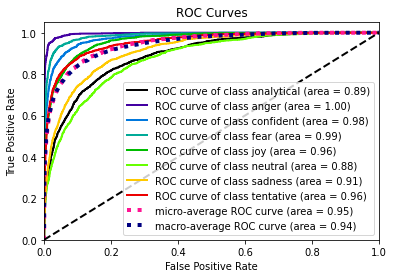


========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.863875
Accuracy score:  0.863875
F1-score:  0.8610168990865348
Precision-score:  0.8601191600384817
Recall-score:  0.8631538361791566
ROC-AUC-score:  0.9742713677963009
[[1432   10   52   29   77  167  123   83]
 [   0 2051    0    0    0    0    0    0]
 [  35    2 1913    9   20   27   27    3]
 [   1    0    3 1935    2   18   11    4]
 [  32    2   18    2 1802   73   11   20]
 [ 145   35   65   38   98 1412  144   98]
 [ 121   19   57   35   23  150 1441   87]
 [  46    4    5   18   20   65   44 1836]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


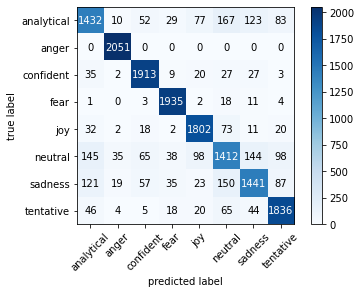

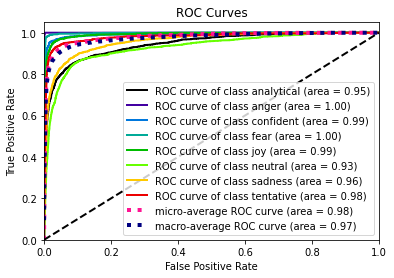


========== Random Forest ==========
Random Forest Test Accuracy: 0.8548125
Accuracy score:  0.8548125
F1-score:  0.8501296672991447
Precision-score:  0.8503929856451782
Recall-score:  0.8536668402533742
ROC-AUC-score:  0.9819607790907151
[[1253   10   87   31  108  218  159  107]
 [   0 2051    0    0    0    0    0    0]
 [  18    5 1961    7    9   13   22    1]
 [   2    0    0 1951    0    6   10    5]
 [  30    4   33    7 1786   66    8   26]
 [ 108   39   61   21  144 1476  125   61]
 [ 137   25   65   23   54  145 1371  113]
 [  44    9   11   16   37   53   40 1828]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


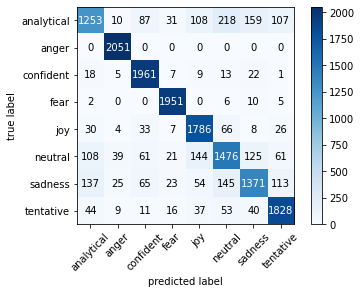

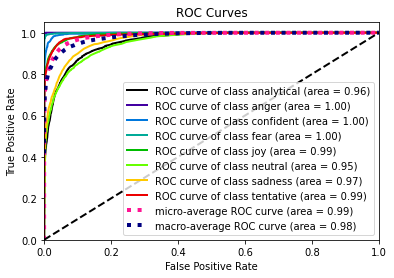


========== K-nearest Neighbors ==========
K-nearest Neighbors Test Accuracy: 0.43425
Accuracy score:  0.43425
F1-score:  0.42478946632182396
Precision-score:  0.7871683883800094
Recall-score:  0.4299847155816656
ROC-AUC-score:  0.8436567379927749
[[  73    1    7    8    7 1876    1    0]
 [   0 1926    2    0    0  123    0    0]
 [   3    4  751    5    5 1263    2    3]
 [   5    3    2 1365    1  596    1    1]
 [  11    1    6    4  542 1390    2    4]
 [  13    9   10   14    9 1958   10   12]
 [   9    2    8    2    0 1855   52    5]
 [  10    3    2    6    5 1729    2  281]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


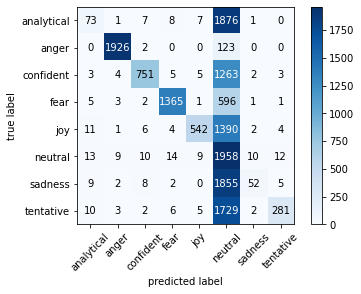

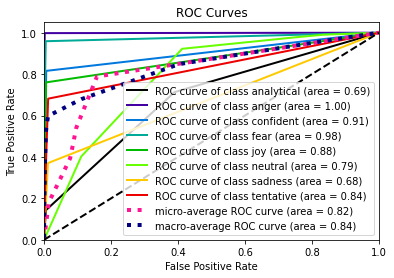


========== Support Vector Machine ==========
Support Vector Machine Test Accuracy: 0.6433125
Accuracy score:  0.6433125
F1-score:  0.6385727899788849
Precision-score:  0.6477438566235758
Recall-score:  0.6430229774480261
ROC-AUC-score:  0.9125314862504492
[[ 888   56  127   73  267  217  239  106]
 [  38 1729   48   19   75   41   85   16]
 [  73   91 1426   40  172   99  128    7]
 [  80   49   32 1449   91   97  106   70]
 [  65   28   94   16 1598   76   40   43]
 [ 140  186  121   75  438  818  178   79]
 [ 130  107   92   66  175  160 1093  110]
 [ 116   60   38   57  214  117  144 1292]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


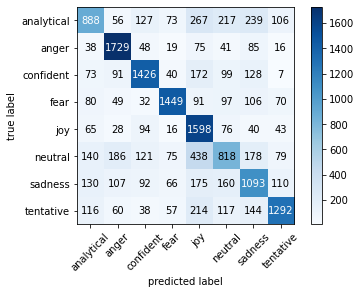

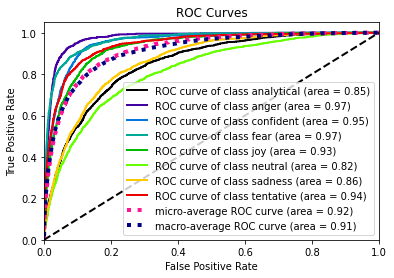


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.81625
Accuracy score:  0.81625
F1-score:  0.809637446551107
Precision-score:  0.8080925275251181
Recall-score:  0.8149270513719845
ROC-AUC-score:  0.8945237144732647
[[1120   22  103   48  117  215  222  126]
 [   0 2045    0    0    3    0    3    0]
 [  38   11 1919    7   13   23   18    7]
 [   3    1    4 1945    2    9    4    6]
 [  45    9   30   13 1710   89   31   33]
 [ 152   50   64   41  154 1327  162   85]
 [ 180   41   67   43   77  152 1246  127]
 [  64    7   15   28   46   70   60 1748]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


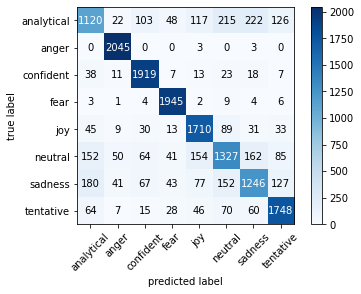

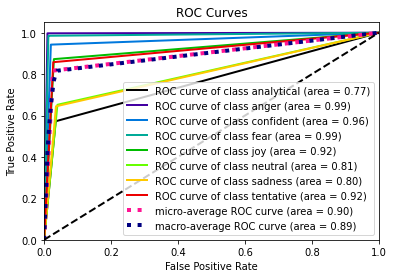

--------------------------------------
Classifier with best accuracy:Logistic Regression


In [14]:
# BagOfWords

pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('mnb_model', MultinomialNB(alpha=0.315789, fit_prior=True))])

pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('lr_model', LogisticRegression(C=10000, solver='saga', n_jobs=-1))])

pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('rf_model', RandomForestClassifier(n_estimators=200, n_jobs=-1))])

pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('knn_model', KNeighborsClassifier())])

pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('svm_model', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, 
                                                     random_state=42, max_iter=5, tol=None))])

pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                         ('dt_model', DecisionTreeClassifier(criterion='gini', max_depth=None))])

## Make the list of pipelines
pipelines = [pipeline_mnb, pipeline_lr, pipeline_rf, pipeline_knn, pipeline_svm, pipeline_dt] #, pipeline_svm

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Multinomial NaiveBayes', 1: 'Logistic Regression', 2: 'Random Forest', 
             3: 'K-nearest Neighbors', 4: 'Support Vector Machine', 5: 'Decision Tree'}

start = datetime.now()

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
class_names = ['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral', 'sadness', 'tentative']

for i,model in enumerate(pipelines):
    
    y_predict_test = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('Accuracy score: ',accuracy_score(y_test, y_predict_test))
    print('F1-score: ',f1_score(y_test, y_predict_test, average='macro'))
    print('Precision-score: ',precision_score(y_test, y_predict_test, average='macro'))
    print('Recall-score: ',recall_score(y_test, y_predict_test, average='macro'))
    print('ROC-AUC-score: ',roc_auc_score(y_test, y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_test, y_predict_test)) 
    
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict_test),class_names=class_names,colorbar=True) 
    skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
    plt.show()

# Best accuracy model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('--------------------------------------')
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))    

# TF-IDF - Bigrams

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Execution time is:  0:46:55.570499

========== Multinomial NaiveBayes ==========
Multinomial NaiveBayes Test Accuracy: 0.7539375
Accuracy score:  0.7539375
F1-score:  0.7433602244917994
Precision-score:  0.7460107692513629
Recall-score:  0.7530870442009135
ROC-AUC-score:  0.9561499440397571
[[ 977   64  121  111  113  148  308  131]
 [   0 2040    3    0    0    3    2    3]
 [  49   23 1790   30   20   33   69   22]
 [   4    4    5 1929    3    2   25    2]
 [  39   19   36   41 1615   65   90   55]
 [ 190   93  123  114  133  948  321  113]
 [ 164   64   99  117   60   96 1217  116]
 [ 104   36   31   76   54   58  132 1547]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


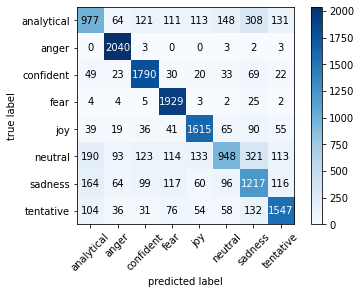

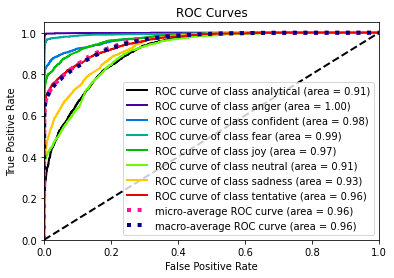


========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.7775625
Accuracy score:  0.7775625
F1-score:  0.7757403804475396
Precision-score:  0.7763171935946553
Recall-score:  0.7764690874116533
ROC-AUC-score:  0.961347516188862
[[1049   12   66   28   91  354  239  134]
 [   0 2043    0    0    0    8    0    0]
 [  68    4 1762   12   21   75   74   20]
 [   7    2    5 1917    5   12   21    5]
 [  58    1   28   13 1601  140   68   51]
 [ 227   24   66   39  106 1276  202   95]
 [ 206   13   52   33   53  239 1242   95]
 [ 127    5   15   28   51  169   92 1551]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


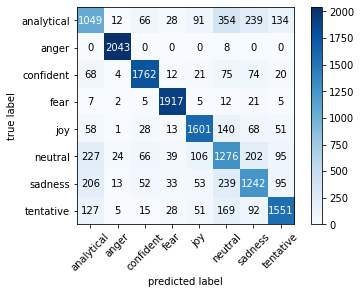

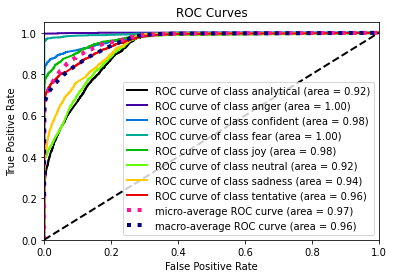


========== Random Forest ==========
Random Forest Test Accuracy: 0.7626875
Accuracy score:  0.7626875
F1-score:  0.7642349156934949
Precision-score:  0.7909673654753686
Recall-score:  0.7606965953267
ROC-AUC-score:  0.9463990161728414
[[ 859    9   72   31   72  667  151  112]
 [   0 2042    0    0    0    9    0    0]
 [  39    2 1743    7   15  184   33   13]
 [   8    1    3 1910    0   38   11    3]
 [  38    4   26   13 1546  276   25   32]
 [ 130   16   63   21   66 1582   85   72]
 [ 144   15   64   26   44  495 1041  104]
 [  75    4   21   14   38  358   48 1480]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


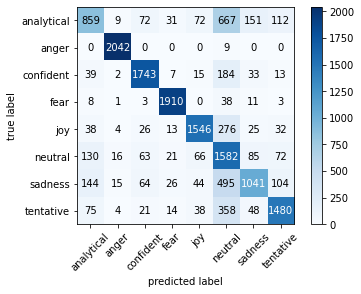

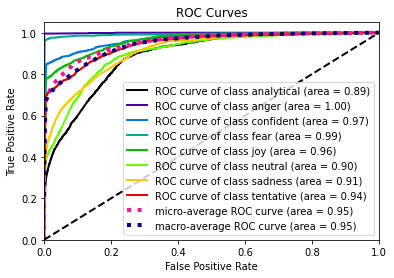


========== K-nearest Neighbors ==========
K-nearest Neighbors Test Accuracy: 0.5209375
Accuracy score:  0.5209375
F1-score:  0.5138082159222316
Precision-score:  0.619530223207519
Recall-score:  0.5179509568671726
ROC-AUC-score:  0.8226212452956286
[[ 616   71   31  142   37  932   32  112]
 [  23 1986    2    6    0   26    0    8]
 [ 267   75 1086   73   20  444    4   67]
 [  93   31    7 1674   12  133    2   22]
 [ 310   84   24   98  852  507   17   68]
 [ 363   90   30  156   30 1259   29   78]
 [ 428   85   46  154   28  914  200   78]
 [ 316   60   28  117   35  795   25  662]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


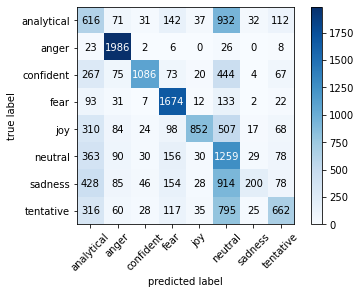

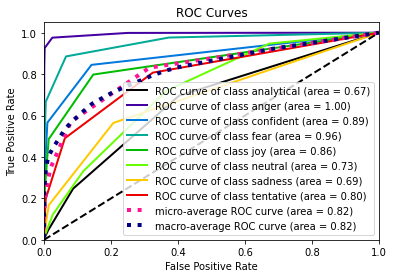


========== Support Vector Machine ==========
Support Vector Machine Test Accuracy: 0.6810625
Accuracy score:  0.6810625
F1-score:  0.6791023440337025
Precision-score:  0.7446000880245427
Recall-score:  0.6820642297681885
ROC-AUC-score:  0.9167840429199735
[[ 862   27   46   92  213   39  657   37]
 [   1 1972    9    1    9    0   59    0]
 [  67   16 1303   52  113   16  459   10]
 [  33    7   10 1827   18    2   72    5]
 [  40   10   31   40 1604   20  192   23]
 [ 175   59   37  123  243  677  688   33]
 [ 112   33   16   92  113   20 1512   35]
 [ 124   18   11   99  165   27  454 1140]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


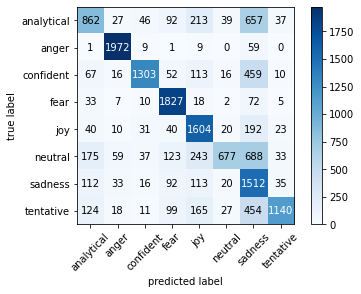

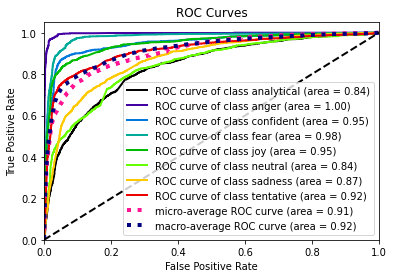


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.7504375
Accuracy score:  0.7504375
F1-score:  0.7494502077795726
Precision-score:  0.7723244534170944
Recall-score:  0.7484057627768086
ROC-AUC-score:  0.8901175648247259
[[ 818   28   82   42   74  642  158  129]
 [   1 2042    0    0    0    5    0    3]
 [  39    6 1737    8   20  173   40   13]
 [  11    4    1 1908    3   27    7   13]
 [  33   13   20   11 1541  275   29   38]
 [ 147   33   76   39   72 1509   83   76]
 [ 154   26   76   44   43  480  992  118]
 [  77   12   25   24   37  353   50 1460]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


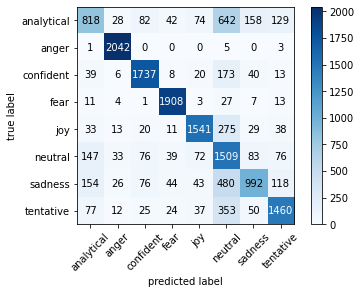

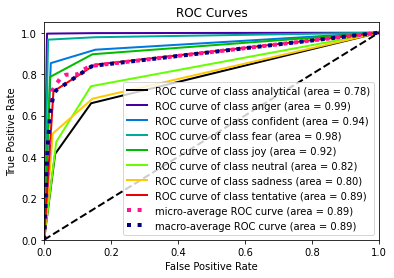

--------------------------------------
Classifier with best accuracy:Logistic Regression


In [15]:
# BagOfWords

pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('mnb_model', MultinomialNB(alpha=0.315789, fit_prior=True))])

pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('lr_model', LogisticRegression(C=10000, solver='saga', n_jobs=-1))])

pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('rf_model', RandomForestClassifier(n_estimators=200, n_jobs=-1))])

pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('knn_model', KNeighborsClassifier())])

pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('svm_model', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, 
                                                     random_state=42, max_iter=5, tol=None))])

pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                         ('dt_model', DecisionTreeClassifier(criterion='gini', max_depth=None))])

## Make the list of pipelines
pipelines = [pipeline_mnb, pipeline_lr, pipeline_rf, pipeline_knn, pipeline_svm, pipeline_dt] #, pipeline_svm

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Multinomial NaiveBayes', 1: 'Logistic Regression', 2: 'Random Forest', 
             3: 'K-nearest Neighbors', 4: 'Support Vector Machine', 5: 'Decision Tree'}

start = datetime.now()

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
class_names = ['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral', 'sadness', 'tentative']

for i,model in enumerate(pipelines):
    
    y_predict_test = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('Accuracy score: ',accuracy_score(y_test, y_predict_test))
    print('F1-score: ',f1_score(y_test, y_predict_test, average='macro'))
    print('Precision-score: ',precision_score(y_test, y_predict_test, average='macro'))
    print('Recall-score: ',recall_score(y_test, y_predict_test, average='macro'))
    print('ROC-AUC-score: ',roc_auc_score(y_test, y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_test, y_predict_test)) 
    
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict_test),class_names=class_names,colorbar=True) 
    skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
    plt.show()

# Best accuracy model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('--------------------------------------')
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

# Make some simple prediction

In [87]:
# Make a prediction
from neattext.functions import clean_text
sample_text = "I feel sad because I fail my exam"
#This Harry Potter book was so interesting it made me happy
#
sample_text = clean_text(sample_text)
sample_text

'feel sad fail exam'

In [88]:
pipeline_lr.predict([sample_text])

array(['sadness'], dtype=object)

In [89]:
# Prediction Prob
pipeline_lr.predict_proba([sample_text])

array([[1.27095480e-07, 1.35203543e-18, 2.63480580e-12, 1.15772981e-12,
        1.04404312e-20, 2.03461934e-09, 9.99998013e-01, 1.85756795e-06]])

In [83]:
pipeline_lr.classes_

array(['analytical', 'anger', 'confident', 'fear', 'joy', 'neutral',
       'sadness', 'tentative'], dtype=object)

# GridSearchCV

## Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

+ pipeline_mnb
+ pipeline_lr
+ pipeline_rf
+ pipeline_knn
+ pipeline_svm
+ pipeline_dt

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# MultinomialNB
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('mnb_model', MultinomialNB())])

param_grid = [
    {'mnb_model__alpha': np.linspace(0, 2, 20), 
     'mnb_model__fit_prior': [True, False]}
]

start = datetime.now()

grid_search = GridSearchCV(pipeline_mnb, param_grid, cv=3, return_train_score= True)
best_model = grid_search.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Execution time is:  0:13:26.636295
Best score:  0.7172499999999999
Best params:  {'mnb_model__alpha': 0.3157894736842105, 'mnb_model__fit_prior': True}
Pipeline(steps=[('cv', CountVectorizer()),
                ('mnb_model', MultinomialNB(alpha=0.3157894736842105))])
The mean accuracy of the model is: 0.72925
0.695984375 {'mnb_model__alpha': 0.0, 'mnb_model__fit_prior': True}
0.696125 {'mnb_model__alpha': 0.0, 'mnb_model__fit_prior': False}
0.7160937500000001 {'mnb_model__alpha': 0.10526315789473684, 'mnb_model__fit_prior': True}
0.7162656249999999 {'mnb_model__alpha': 0.10526315789473684, 'mnb_model__fit_prior': False}
0.71709375 {'mnb_model__alpha': 0.21052631578947367, 'mnb_model__fit_prior': True}
0.7171406250000001 {'mnb_model__alpha': 0.21052631578947367, 'mnb_model__fit_prior': False}
0.7172499999999999 {'mnb_model__alpha': 0.3157894736842105, 'mnb_model__fit_prior': True}
0.71715625 {'mnb_model__alpha': 0.3157894736842105, 'mnb_model__fit_prior': False}
0.7163593749999999 {'mnb

In [48]:
# LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('lr_model', LogisticRegression(penalty='l2',n_jobs=-1))])

param_grid = [
    {'lr_model__C': [1, 10, 100, 1000, 1e4, 1e5],
    'lr_model__solver': ['lbfgs', 'sag', 'saga']}
]
# 'lr_model__n_jobs': [None, -1, 1, 5],
#'lr_model__solver': ['lbfgs', 'sag', 'saga'],
#     'lr_model__penalty': ['l2', 'none']
start = datetime.now()
grid_search = GridSearchCV(pipeline_lr, param_grid, cv = 5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train, y_train)
stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Execution time is:  0:05:45.159267
Best score:  0.8569218749999999
Best params:  {'lr_model__C': 10000.0, 'lr_model__solver': 'saga'}
Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_model',
                 LogisticRegression(C=10000.0, n_jobs=-1, solver='saga'))])
The mean accuracy of the model is: 0.878125
0.8498281249999999 {'lr_model__C': 1, 'lr_model__solver': 'lbfgs'}
0.85040625 {'lr_model__C': 1, 'lr_model__solver': 'sag'}
0.850421875 {'lr_model__C': 1, 'lr_model__solver': 'saga'}
0.855484375 {'lr_model__C': 10, 'lr_model__solver': 'lbfgs'}
0.8559999999999999 {'lr_model__C': 10, 'lr_model__solver': 'sag'}
0.856796875 {'lr_model__C': 10, 'lr_model__solver': 'saga'}
0.8518593750000001 {'lr_model__C': 100, 'lr_model__solver': 'lbfgs'}
0.85584375 {'lr_model__C': 100, 'lr_model__solver': 'sag'}
0.85690625 {'lr_model__C': 100, 'lr_model__solver': 'saga'}
0.84765625 {'lr_model__C': 1000, 'lr_model__solver': 'l

In [33]:
# Random Forest

pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('rf_model', RandomForestClassifier(n_jobs=-1))])

param_grid = [
    {'rf_model__n_estimators': [50,100,200]}
]
# 'rf_model__criterion':['gini','entropy'],

start = datetime.now()

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, verbose=True)
best_model = grid_search.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Execution time is:  0:13:25.253718
Best score:  0.8094687853068061
Best params:  {'rf_model__n_estimators': 200}
Pipeline(steps=[('cv', CountVectorizer()),
                ('rf_model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1))])
The mean accuracy of the model is: 0.849875
0.8043437835953461 {'rf_model__n_estimators': 50}
0.8076406632355552 {'rf_model__n_estimators': 100}
0.8094687853068061 {'rf_model__n_estimators': 200}


In [28]:
# KNN
# Poor Performance because of Curse of Dimensionality. Too many features
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('knn_model', KNeighborsClassifier())])

param_grid = [
    {'knn_model__n_neighbors':[5, 8]}
]

start = datetime.now()

grid_search = GridSearchCV(pipeline_knn, param_grid, cv=3, verbose=True)
best_model = grid_search.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Execution time is:  0:02:40.920079
Best score:  0.5106408037133409
Best params:  {'knn_model__n_neighbors': 5}
Pipeline(steps=[('cv', CountVectorizer()),
                ('knn_model', KNeighborsClassifier())])
The mean accuracy of the model is: 0.574
0.5106408037133409 {'knn_model__n_neighbors': 5}
0.4547816091031691 {'knn_model__n_neighbors': 8}


In [13]:
# SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('svm_model', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, 
                                                     random_state=42, tol=None))])

param_grid = [
    {'svm_model__max_iter':[5, 50, 100, 1000]}
]

start = datetime.now()

grid_search = GridSearchCV(pipeline_svm, param_grid, cv=3, verbose=True)
best_model = grid_search.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Execution time is:  0:10:58.411331
Best score:  0.7177188172439292
Best params:  {'svm_model__max_iter': 5}
Pipeline(steps=[('cv', CountVectorizer()),
                ('svm_model',
                 SGDClassifier(alpha=0.001, loss='log', max_iter=5,
                               random_state=42, tol=None))])
The mean accuracy of the model is: 0.7210625
0.7177188172439292 {'svm_model__max_iter': 5}
0.7167188023510955 {'svm_model__max_iter': 50}
0.7165938062572234 {'svm_model__max_iter': 100}
0.7154844263739455 {'svm_model__max_iter': 1000}


In [23]:
# Decision Tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                         ('dt_model', DecisionTreeClassifier())])

param_grid = [
    {'dt_model__criterion':['gini', 'entropy'],
    'dt_model__max_depth':[None, 10, 50, 100]}
]

start = datetime.now()

grid_search = GridSearchCV(pipeline_dt, param_grid, cv=3, verbose=True)
best_model = grid_search.fit(X_train, y_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time is: ", execution_time)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Execution time is:  0:04:54.214742
Best score:  0.7632344305475863
Best params:  {'dt_model__criterion': 'gini', 'dt_model__max_depth': None}
Pipeline(steps=[('cv', CountVectorizer()),
                ('dt_model', DecisionTreeClassifier())])
The mean accuracy of the model is: 0.813375
0.7632344305475863 {'dt_model__criterion': 'gini', 'dt_model__max_depth': None}
0.287265630511274 {'dt_model__criterion': 'gini', 'dt_model__max_depth': 10}
0.5387969641288793 {'dt_model__criterion': 'gini', 'dt_model__max_depth': 50}
0.6430781875688848 {'dt_model__criterion': 'gini', 'dt_model__max_depth': 100}
0.755718735720789 {'dt_model__criterion': 'entropy', 'dt_model__max_depth': None}
0.294359359518972 {'dt_model__criterion': 'entropy', 'dt_model__max_depth': 10}
0.5434844604691159 {'dt_model__criterion': 'entropy', 'dt_model__max_depth': 50}
0.6503750396235874 {'dt_model__criterion': 'entropy', 'dt_model__max_depth': 100}


# Save Model

In [13]:
import joblib
os.chdir("D:\Course Learning - UM\Sem 5\Data Science Project\Emotion Analysis for Long Covid\PipelineModel") 

In [14]:
model_file = open("emotion_classifier_lr_model_22_Dec_2021.pkl","wb")
joblib.dump(pipeline_lr,model_file)
model_file.close()